In [1]:
from geoband.API import *
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
import pandas as pd
import json
from pandas import json_normalize
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geoband.API import *
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from geopandas import GeoDataFrame
# GetCompasData로 주피터 노트북 경로에 파일 저장
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
from fiona.crs import from_string

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import splot

In [3]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') #한글 폰트 지정?

# 데이터 연결
1. 격자별 데이터 연결 : 격자별 데이터가 존재하는 경우
2. 좌표별 데이터 연결 : 좌표 데이터가 존재하는 경우 특정 격자에 연결
3. area 데이터 연결 : 격자에 걸친 area(면적)이 존재하는 경우

> ## 국토정보맵

## 1. 격자별 데이터 연결

In [87]:
# 수원시 격자별 총인구수
suwon_grid_people = gpd.read_file("nlsp_031001001.shp",encoding="utf-8")

# 수원시 격자별 총인구수 여자
suwon_grid_wman = gpd.read_file("nlsp_031001003.shp",encoding="utf-8")

# 수원시 격자별 총인구수 남자
suwon_grid_man = gpd.read_file("nlsp_031001002.shp",encoding="utf-8")

# 수원시 격자별 총인구수 중학생
suwon_grid_mid = gpd.read_file("nlsp_031001019.shp",encoding="utf-8")

# 수원시 격자별 총인구수 고등학생
suwon_grid_high = gpd.read_file("nlsp_031001022.shp",encoding="utf-8")

# 수원시 격자별 총인구수 고령자
suwon_grid_old = gpd.read_file("nlsp_031001010.shp",encoding="utf-8")

# 수원시 격자별 총인구수 20대
suwon_grid_20 = gpd.read_file("nlsp_031001025.shp",encoding="utf-8")

# 수원시 격자별 주거용도건축물면적
suwon_grid_live = gpd.read_file("nlsp_031005004.shp",encoding="utf-8")

# 수원시 격자별 주거용도(단독)
suwon_grid_house = gpd.read_file("nlsp_031002022.shp",encoding="utf-8")

# 수원시 격자별 주거용도(공동)
suwon_grid_apt = gpd.read_file("nlsp_031002023.shp",encoding="utf-8")

# 수원시 격자별 주거용도(용적률)
suwon_grid_floor = gpd.read_file("nlsp_031002010.shp",encoding="utf-8")

# 수원시 격자별 35년 이상 건축물
suwon_grid_35old = gpd.read_file("nlsp_031002020.shp",encoding="utf-8")

# 수원시 격자별 30년 이상 ~ 35년 미만 건축물
suwon_grid_30old = gpd.read_file("nlsp_031002019.shp",encoding="utf-8")

# 수원시 격자별 총 건축물
suwon_grid_all = gpd.read_file("nlsp_031002021.shp",encoding="utf-8")

# 수원시 격자별 개별주택가격
suwon_grid_price = gpd.read_file("nlsp_031005001.shp",encoding="utf-8")

# 수원시 격자정보
suwon_112_grid = gpd.read_file('2.수원시_112신고(격자별 신고횟수).geojson').drop(["rep_cnt"],axis=1)

data_lst = [suwon_grid_people, suwon_grid_wman, suwon_grid_man, suwon_grid_mid, suwon_grid_high,
            suwon_grid_old, suwon_grid_20, suwon_grid_live, suwon_grid_house, suwon_grid_apt, suwon_grid_floor,
            suwon_grid_35old, suwon_grid_30old, suwon_grid_all, suwon_grid_price]

data_name_lst = ["총인구수","여자인구수","남자인구수","중학생수","고등학생수","고령자수","20대수",
                "주거용건축물면적","단독주거건축물","공동주거건축물","주거용도용적률","35년이상건축물수",
                "30~34년건축물수","총건축물수","개별주택가격"]

result_lst = []

데이터 불러온 뒤
- 좌표계 epsg:4326 변환
- 컬럼명 수정하기

In [88]:
def clear_grid_data(data,col):
    test = gpd.GeoDataFrame(data)
    test = test.to_crs(epsg="4326")
    # 좌표계 변환

    test = test.rename(columns={"val":col})
    # col로 "val"열의 이름 변경
    # col : 우리가 설정하는 이름 ex) 총인구수
    
    return test.drop("lbl",axis=1).fillna(0)

총 15개의 격자데이터 함수 돌리기
- data_lst : 15개의 격자 데이터 원본
- data_name_lst : 15개의 격자 데이터 명
- result_lst : 변환된 데이터 넣어주기

In [89]:
result_merge = suwon_112_grid

for i in range(len(data_lst)):
    result = clear_grid_data(data_lst[i],data_name_lst[i])
    result_lst.append(result)
    # clear_grid_data 처리해준 데이터
    
    result_merge = pd.merge(result_merge,result.drop("geometry",axis=1),on=["gid"],how="inner")
    # suwon_112_grid 에 격자별 데이터 계속 덧붙여주기

추가변수 가공하기
- 청년수 = 중학생수 + 고등학생수 + 20대 수
- 노후건물 비율

In [90]:
result_merge["청년수"] = result_merge["중학생수"] + result_merge["고등학생수"] + result_merge["20대수"]

result_merge["30년이상건축물수"] = result_merge["35년이상건축물수"] + result_merge["30~34년건축물수"] + result_merge["20대수"]
result_merge["30년이상건축물비율"] = result_merge["30년이상건축물수"] / result_merge["총건축물수"] 

result_merge.drop(["중학생수","고등학생수","20대수"],axis=1,inplace=True)

result_merge["단독주거건축물비율"] = result_merge["단독주거건축물"] / result_merge["총건축물수"]
result_merge["공동주거건축물비율"] = result_merge["공동주거건축물"] / result_merge["총건축물수"]

In [91]:
result1 = result_merge
result1.head(2)

,gid,geometry,총인구수,여자인구수,남자인구수,고령자수,주거용건축물면적,단독주거건축물,공동주거건축물,주거용도용적률,35년이상건축물수,30~34년건축물수,총건축물수,개별주택가격,청년수,30년이상건축물수,30년이상건축물비율,단독주거건축물비율,공동주거건축물비율
0,다사49aa19ab,"MULTIPOLYGON (((126.92477 37.27077, 126.92475 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,다사49aa19ba,"MULTIPOLYGON (((126.92475 37.27302, 126.92473 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


> ## 시간대별_성별_요일별 유동인구
- 년월 단위이니까 월별로 평균?
- point_grid 함수 이용해서 일단 격자에 매핑해주기(유동인구 데이터 좌표로 주어짐)

### gid별로 월평균 내기 전에 이 상태에서 다양한 시각화 그림 뽑아낼 수 있을 듯 
- 몇월에 어느지역에서 유동인구가 많은지?

In [92]:
def grid_grid(data_df,suwon_grid,col="None"):
    df = data_df.copy()
    if "geometry" in df.columns:
        pass
    else:
        epsg4326 = from_string("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
        df['Point'] = df.apply(lambda x : Point([x['lon'], x['lat']]), axis=1)
        df = gpd.GeoDataFrame(df, geometry='Point', crs = epsg4326)
        
    gid_result = gpd.sjoin(suwon_grid, df, how='left', op="intersects").drop(["index_right"],axis=1)
    
    return gid_result

In [93]:
suwon_time_flow_pop = pd.read_csv('4.수원시_시간대별_유동인구(2020).csv')
suwon_sex_age_flow_pop = pd.read_csv('5.수원시_성연령별_유동인구(2020).csv')
suwon_day_flow_pop = pd.read_csv('6.수원시_요일별_유동인구(2020).csv')

In [94]:
suwon_day_flow_pop = pd.read_csv('6.수원시_요일별_유동인구(2020).csv')
# 데이터 읽어오기

suwon_day_flow_pop.columns = ["기준년월","월요일유동인구","화요일유동인구","수요일유동인구","목요일유동인구",
                             "금요일유동인구","토요일유동인구","일요일유동인구","lon","lat"]
# 열 이름 설정

suwon_day_flow_pop["년"] = suwon_day_flow_pop["기준년월"].apply(lambda x : int(str(x)[:4]))
suwon_day_flow_pop["월"] = suwon_day_flow_pop["기준년월"].apply(lambda x : int(str(x)[4:]))
suwon_day_flow_pop = suwon_day_flow_pop.drop(["기준년월"],axis=1)
# 기준년월 데이터 파싱

In [95]:
suwon_sex_age_flow_pop = pd.read_csv('5.수원시_성연령별_유동인구(2020).csv')
# 데이터 읽어오기

suwon_sex_age_flow_pop.columns = ["기준년월","남자유동인구수_10대_수치","남자유동인구수_20대_수치","남자유동인구수_30대_수치",
                                 "남자유동인구수_40대_수치","남자유동인구수_50대_수치","남자유동인구수_60대이상_수치",
                                 "여자유동인구수_10대_수치","여자유동인구수_20대_수치","여자유동인구수_30대_수치",
                                 "여자유동인구수_40대_수치","여자유동인구수_50대_수치","여자유동인구수_60대이상_수치","lon","lat"]
# 열 이름 설정

suwon_sex_age_flow_pop["년"] = suwon_sex_age_flow_pop["기준년월"].apply(lambda x : int(str(x)[:4]))
suwon_sex_age_flow_pop["월"] = suwon_sex_age_flow_pop["기준년월"].apply(lambda x : int(str(x)[4:]))
suwon_sex_age_flow_pop = suwon_sex_age_flow_pop.drop(["기준년월"],axis=1)
# 기준년월 데이터 파싱

In [96]:
suwon_time_flow_pop = pd.read_csv('4.수원시_시간대별_유동인구(2020).csv')

suwon_time_flow_pop.columns = ["기준년월",'0시기준_측정정보', '1시기준_측정정보', '2시기준_측정정보', '3시기준_측정정보', 
                               '4시기준_측정정보', '5시기준_측정정보', '6시기준_측정정보', '7시기준_측정정보', '8시기준_측정정보', 
                               '9시기준_측정정보', '10시기준_측정정보', '11시기준_측정정보', '12시기준_측정정보', '13시기준_측정정보',
                               '14시기준_측정정보', '15시기준_측정정보', '16시기준_측정정보', '17시기준_측정정보', '18시기준_측정정보',
                               '19시기준_측정정보', '20시기준_측정정보', '21시기준_측정정보', '22시기준_측정정보', '23시기준_측정정보',
                               "lon","lat"]
# 열 이름 설정

suwon_time_flow_pop["년"] = suwon_time_flow_pop["기준년월"].apply(lambda x : int(str(x)[:4]))
suwon_time_flow_pop["월"] = suwon_time_flow_pop["기준년월"].apply(lambda x : int(str(x)[4:]))
suwon_time_flow_pop = suwon_time_flow_pop.drop(["기준년월"],axis=1)
# 기준년월 데이터 파싱

In [97]:
concat1 = pd.merge(suwon_time_flow_pop,suwon_sex_age_flow_pop,on = ["lon","lat","년","월"],how="inner")
concat2 = pd.merge(suwon_day_flow_pop,concat1,on = ["lon","lat","년","월"],how="inner")

In [98]:
# 수원시 격자정보
suwon_112_grid = gpd.read_file('2.수원시_112신고(격자별 신고횟수).geojson').drop(["rep_cnt"],axis=1)

#time_sex_weekday_pop = pd.read_csv("시간대_성별_요일별_유동인구.csv")
time_sex_weekday_pop = concat2
print(time_sex_weekday_pop.columns)

Index(['월요일유동인구', '화요일유동인구', '수요일유동인구', '목요일유동인구', '금요일유동인구', '토요일유동인구',
       '일요일유동인구', 'lon', 'lat', '년', '월', '0시기준_측정정보', '1시기준_측정정보',
       '2시기준_측정정보', '3시기준_측정정보', '4시기준_측정정보', '5시기준_측정정보', '6시기준_측정정보',
       '7시기준_측정정보', '8시기준_측정정보', '9시기준_측정정보', '10시기준_측정정보', '11시기준_측정정보',
       '12시기준_측정정보', '13시기준_측정정보', '14시기준_측정정보', '15시기준_측정정보', '16시기준_측정정보',
       '17시기준_측정정보', '18시기준_측정정보', '19시기준_측정정보', '20시기준_측정정보', '21시기준_측정정보',
       '22시기준_측정정보', '23시기준_측정정보', '남자유동인구수_10대_수치', '남자유동인구수_20대_수치',
       '남자유동인구수_30대_수치', '남자유동인구수_40대_수치', '남자유동인구수_50대_수치',
       '남자유동인구수_60대이상_수치', '여자유동인구수_10대_수치', '여자유동인구수_20대_수치',
       '여자유동인구수_30대_수치', '여자유동인구수_40대_수치', '여자유동인구수_50대_수치',
       '여자유동인구수_60대이상_수치'],
      dtype='object')


In [99]:
time_sex_weekday_pop_grid = grid_grid(time_sex_weekday_pop,suwon_112_grid)
# time_sex_weekday_pop_grid : 격자별 시간대, 성별, 요일별 유동인구

time_sex_weekday_pop_grid.head(2)

,gid,geometry,월요일유동인구,화요일유동인구,수요일유동인구,목요일유동인구,금요일유동인구,토요일유동인구,일요일유동인구,lon,...,남자유동인구수_30대_수치,남자유동인구수_40대_수치,남자유동인구수_50대_수치,남자유동인구수_60대이상_수치,여자유동인구수_10대_수치,여자유동인구수_20대_수치,여자유동인구수_30대_수치,여자유동인구수_40대_수치,여자유동인구수_50대_수치,여자유동인구수_60대이상_수치
0,다사49aa19ab,"MULTIPOLYGON (((126.92477 37.27077, 126.92475 ...",0.11,0.12,0.11,0.12,0.12,0.25,0.25,126.927402,...,0.00,0.02,0.04,0.02,0.0,0.0,0.00,0.04,0.02,0.00
0,다사49aa19ab,"MULTIPOLYGON (((126.92477 37.27077, 126.92475 ...",0.12,0.16,0.17,0.16,0.15,0.36,0.38,126.927402,...,0.02,0.03,0.03,0.02,0.0,0.0,0.02,0.02,0.03,0.01


gid 별로 groupby 해주기
- 월별로 데이터 있는 것 -> 하나로 합치기

In [100]:
groupby_col = ['월요일유동인구', '화요일유동인구', '수요일유동인구', '목요일유동인구',
       '금요일유동인구', '토요일유동인구', '일요일유동인구','0시기준_측정정보',
       '1시기준_측정정보', '2시기준_측정정보', '3시기준_측정정보', '4시기준_측정정보', '5시기준_측정정보',
       '6시기준_측정정보', '7시기준_측정정보', '8시기준_측정정보', '9시기준_측정정보', '10시기준_측정정보',
       '11시기준_측정정보', '12시기준_측정정보', '13시기준_측정정보', '14시기준_측정정보', '15시기준_측정정보',
       '16시기준_측정정보', '17시기준_측정정보', '18시기준_측정정보', '19시기준_측정정보', '20시기준_측정정보',
       '21시기준_측정정보', '22시기준_측정정보', '23시기준_측정정보', '남자유동인구수_10대_수치',
       '남자유동인구수_20대_수치', '남자유동인구수_30대_수치', '남자유동인구수_40대_수치', '남자유동인구수_50대_수치',
       '남자유동인구수_60대이상_수치', '여자유동인구수_10대_수치', '여자유동인구수_20대_수치',
       '여자유동인구수_30대_수치', '여자유동인구수_40대_수치', '여자유동인구수_50대_수치',
       '여자유동인구수_60대이상_수치']

# groupby 해줄 column

aggregation = {col:"mean" for col in groupby_col}

time_sex_weekday_pop_grid_groupby = time_sex_weekday_pop_grid.groupby(["gid"]).agg(aggregation).reset_index().fillna(0)
# 격자별로 groupby

In [101]:
result2 = time_sex_weekday_pop_grid_groupby
result2

,gid,월요일유동인구,화요일유동인구,수요일유동인구,목요일유동인구,금요일유동인구,토요일유동인구,일요일유동인구,0시기준_측정정보,1시기준_측정정보,...,남자유동인구수_30대_수치,남자유동인구수_40대_수치,남자유동인구수_50대_수치,남자유동인구수_60대이상_수치,여자유동인구수_10대_수치,여자유동인구수_20대_수치,여자유동인구수_30대_수치,여자유동인구수_40대_수치,여자유동인구수_50대_수치,여자유동인구수_60대이상_수치
0,다사49aa19ab,2.540588,2.351176,2.354118,2.364706,2.677647,3.072353,3.096471,0.032941,0.045588,...,0.179412,0.357353,0.450000,0.467647,0.071176,0.070000,0.119706,0.243529,0.286471,0.216765
1,다사49aa19ba,3.614000,3.265000,3.301000,3.294000,3.753000,3.064000,3.087000,0.015000,0.010000,...,0.221000,0.460000,0.689000,0.746000,0.026000,0.054000,0.098000,0.245000,0.367000,0.285000
2,다사49aa20aa,0.230000,0.210000,0.210000,0.185000,0.165000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.020000,0.040000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,다사49ab18ab,1.055000,1.086429,1.049286,1.077857,1.123571,1.252143,1.230714,0.022857,0.037143,...,0.099286,0.132857,0.146429,0.132143,0.037143,0.058571,0.090000,0.108571,0.116429,0.103571
4,다사49ab18ba,1.251951,1.286341,1.267805,1.300000,1.358537,1.641707,1.698780,0.020488,0.040488,...,0.117561,0.157073,0.182927,0.162927,0.041220,0.060488,0.116341,0.146098,0.161707,0.124878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,다사63ba21aa,4.808750,5.689583,5.685833,5.657500,6.270417,5.908750,5.072083,0.041667,0.048750,...,0.447083,1.285000,1.270833,0.632500,0.116667,0.106250,0.195833,0.549167,0.485417,0.245417
2086,다사63ba21ab,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2087,다사63ba21ba,1.680000,1.789500,1.784500,1.822500,2.050000,2.938500,2.571500,0.032500,0.022500,...,0.233000,0.353000,0.312000,0.209000,0.052000,0.077000,0.168500,0.231500,0.172500,0.130500
2088,다사63ba21bb,10.604839,10.933333,10.945376,11.416129,11.815806,5.364409,4.657419,0.146129,0.104516,...,0.989785,1.531398,1.288387,1.047527,0.286022,0.354946,0.701613,1.037957,0.773333,0.699570


> ## 격자별 112 신고 데이터

In [102]:
#suwon_112_get_grid = gpd.read_file("수원시_112신고이력_전처리완료_격자매핑.geojson")

## 2. 좌표별 데이터 연결

좌표 있는 데이텨 불러오기

- 지하철역 데이터 처리하기
- 초중고 데이터 처리하기

In [5]:
others_playground = pd.read_csv('40.4개시도_어린이놀이시설현황.csv')
others_convenience = gpd.read_file('42.4개시도_편의점현황.geojson')
others_park =pd.read_csv('27.4개시도_공원현황.csv')
others_security_bell = gpd.read_file('23.4개시도_안전비상벨현황.geojson')
suwon_homeless = pd.read_csv('13.수원시_노숙인자활시설현황.csv')
suwon_child_welfare = pd.read_csv('14.수원시_아동복지시설현황.csv')
suwon_child_center = pd.read_csv('15.수원시_지역아동센터시설현황.csv')
suwon_youth_study = pd.read_csv('16.수원시_청소년공부방현황.csv')
suwon_library = pd.read_csv('17.수원시_도서관현황.csv')
suwon_free_cafeteria =pd.read_csv('18.수원시_무료급식소현황.csv')
suwon_child_free_cafeteria = pd.read_csv('19.수원시_아동복지급식소현황.csv')
suwon_female_parcel = pd.read_csv('20.수원시_여성안심택배함현황.csv')

# 치안시설
suwon_street_lamp = pd.read_csv('21.수원시_가로등현황.csv')
others_police = pd.read_csv('39.4개시도_경찰관서현황.csv')
others_alcohol = gpd.read_file('8.4개시도_유흥업소현황.geojson')

others_security_lamp = pd.read_csv('22.4개시도_보안등현황.csv')
others_cctv = pd.read_csv('24.4개시도_CCTV설치현황.csv')

suwon_112_grid = gpd.read_file('2.수원시_112신고(격자별 신고횟수).geojson').drop(["rep_cnt"],axis=1)

suwon_others_police = others_police[others_police["pname"] == "경기남부청"]
# 수원 경찰서 - 치안센터

others_medic = pd.read_csv("4개시도_병원.csv")
others_drog = pd.read_csv("4개시도_약국.csv")
others_subway = pd.read_csv("4개시도_지하철역.csv")
others_school = pd.read_csv("4개시도_초중고.csv")
others_baby = pd.read_csv("4개시도_어린이집.csv")
others_kinder = pd.read_csv("유치원 현황_위경도매핑.csv")

# 도로 데이터 처리하기
suwon_walk = pd.read_csv("수원시_횡단보도현황.csv")
suwon_light = pd.read_csv("수원시_신호등현황.csv")
others_busstop = pd.read_csv("전국_버스정류장현황.csv")

suwon_cross = pd.read_csv("수원시_교차로현황.csv")
suwon_3cross = pd.read_csv("수원시_삼거리현황.csv")
suwon_4cross = pd.read_csv("수원시_사거리현황.csv")
suwon_5cross = pd.read_csv("수원시_오거리현황.csv")

#### 상권데이터 처리해서 넣어주기
- 숙박시설 / 유흥시설 / 스포츠시설(+)
- 숙박시설 : suwon_commercial_area_accomo
- 유흥시설 : suwon_commercial_area_alcohol
- 스포츠시설 : suwon_commercial_area_play_sport

In [6]:
suwon_commercial_area_accomo = pd.read_csv("수원시_숙박시설현황.csv")
suwon_commercial_area_play_sport = pd.read_csv("수원시_체육시설현황.csv")
suwon_commercial_area_alcohol_play = pd.read_csv("수원시_유흥시설현황.csv")
suwon_commercial_area_play = pd.read_csv("수원시_위락시설현황.csv")
suwon_commercial_area_alcohol = pd.read_csv("수원시_유흥주점현황.csv")
suwon_commercial_area = pd.read_csv("수원시_상업시설현황.csv")
# 상권데이터

#### CCTV와 보안등의 경우 DataFrame 내에 자체적인 개수 열이 존재
- point_grid_cnt_except 함수 이용

In [7]:
def point_grid_cnt_except(data_df,suwon_grid,col="None"):
    df = data_df.copy()

    epsg4326 = from_string("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
    df['Point'] = df.apply(lambda x : Point([x['lon'], x['lat']]), axis=1)
    df = gpd.GeoDataFrame(df, geometry='Point', crs = epsg4326)
        
    gid_result = gpd.sjoin(suwon_grid, df, how='left', op="intersects").drop(["index_right"],axis=1)
    gid_result_groupby = gid_result.groupby("gid").agg({col:"sum"})
    # 격자별로 개수 합쳐주기
    
    print("전체개수 : ",gid_result_groupby.sum())
    return gid_result_groupby.reset_index()

#### CCTV와 보안등 이외의 경우 DataFrame 내에 자체적인 개수 열이 존재하지 않음
- point_grid_cnt 함수 이용

In [8]:
def point_grid_cnt(data_df,suwon_grid,col="None"):
    df = data_df.copy()
    if "geometry" in df.columns:
        pass
    else:
        epsg4326 = from_string("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
        df['Point'] = df.apply(lambda x : Point([x['lon'], x['lat']]), axis=1)
        df = gpd.GeoDataFrame(df, geometry='Point', crs = epsg4326)
        
    df[col+"_격자별개수"] = 1
    gid_result = gpd.sjoin(suwon_grid, df, how='left', op="intersects").drop(["index_right"],axis=1)
    
    gid_result_groupby = gid_result.groupby("gid").agg({col+"_격자별개수":"sum"})
    # 격자별로 개수 합쳐주기
    
    print("전체개수 : ",gid_result_groupby.sum())
    return gid_result_groupby.reset_index()

In [9]:
suwon_playground_grid_cnt = point_grid_cnt(others_playground, suwon_112_grid,"어린이놀이시설")
suwon_female_parcel_grid_cnt = point_grid_cnt(suwon_female_parcel, suwon_112_grid,"여성안심택배함")
suwon_convenience_grid_cnt = point_grid_cnt(others_convenience , suwon_112_grid,"편의점")
suwon_park_grid_cnt = point_grid_cnt(others_park , suwon_112_grid,"공원")
suwon_security_bell_grid_cnt = point_grid_cnt(others_security_bell , suwon_112_grid,"안전비상벨")
suwon_homeless_grid_cnt = point_grid_cnt(suwon_homeless , suwon_112_grid,"노숙인자활시설")
suwon_child_welfare_grid_cnt = point_grid_cnt(suwon_child_welfare, suwon_112_grid,"아동복지시설")
suwon_child_center_grid_cnt = point_grid_cnt(suwon_child_center, suwon_112_grid,"지역아동센터시설")
suwon_youth_study_grid_cnt = point_grid_cnt(suwon_youth_study, suwon_112_grid,"청소년공부방")
suwon_library_grid_cnt = point_grid_cnt(suwon_library, suwon_112_grid,"도서관")
suwon_free_cafeteria_grid_cnt = point_grid_cnt(suwon_free_cafeteria  , suwon_112_grid,"무료급식소")

suwon_street_lamp_grid_cnt = point_grid_cnt(suwon_street_lamp, suwon_112_grid,"가로등")
suwon_alcohol_grid_cnt = point_grid_cnt(others_alcohol, suwon_112_grid,"유흥업소")
suwon_others_police_grid_cnt = point_grid_cnt(suwon_others_police, suwon_112_grid,"경찰서_치안센터")

suwon_security_lamp_grid_cnt = point_grid_cnt_except(others_security_lamp , suwon_112_grid,"securitylight_cnt")
suwon_cctv_grid_cnt = point_grid_cnt_except(others_cctv , suwon_112_grid,"cctv_cnt")

suwon_medic_grid_cnt = point_grid_cnt(others_medic, suwon_112_grid,"병원")
suwon_drog_grid_cnt = point_grid_cnt(others_drog, suwon_112_grid,"약국")
others_subway_grid_cnt = point_grid_cnt(others_subway, suwon_112_grid,"지하철")
others_school_grid_cnt = point_grid_cnt(others_school, suwon_112_grid,"초중고")
others_baby_grid_cnt = point_grid_cnt(others_baby, suwon_112_grid,"어린이집")
others_kinder_grid_cnt = point_grid_cnt(others_kinder, suwon_112_grid,"유치원")

suwon_commercial_area_accomo_grid_cnt = point_grid_cnt(suwon_commercial_area_accomo, suwon_112_grid,"숙박시설")
suwon_commercial_area_alcohol_grid_cnt = point_grid_cnt(suwon_commercial_area_alcohol, suwon_112_grid,"유흥시설")
suwon_commercial_area_play_sport_police_grid_cnt = point_grid_cnt(suwon_commercial_area_play_sport, suwon_112_grid,"스포츠시설")
suwon_commercial_area_grid_cnt = point_grid_cnt(suwon_commercial_area,suwon_112_grid,"상업시설")
suwon_commercial_area_play_grid_cnt = point_grid_cnt(suwon_commercial_area_play,suwon_112_grid,"위락시설")
suwon_commercial_area_alcohol_grid_cnt = point_grid_cnt(suwon_commercial_area_alcohol,suwon_112_grid,"유흥주점")

suwon_walk_grid_cnt = point_grid_cnt(suwon_walk,suwon_112_grid,"횡단보도")
suwon_light_grid_cnt = point_grid_cnt(suwon_light,suwon_112_grid,"신호등")
others_busstop_grid_cnt = point_grid_cnt(others_busstop,suwon_112_grid,"버스정류장")

suwon_cross_walk_grid_cnt = point_grid_cnt(suwon_cross,suwon_112_grid,"교차로")
suwon_3cross_walk_grid_cnt = point_grid_cnt(suwon_3cross,suwon_112_grid,"삼거리")
suwon_4cross_walk_grid_cnt = point_grid_cnt(suwon_4cross,suwon_112_grid,"사거리")
suwon_5cross_walk_grid_cnt = point_grid_cnt(suwon_5cross,suwon_112_grid,"오거리")

전체개수 :  어린이놀이시설_격자별개수    1647.0
dtype: float64
전체개수 :  여성안심택배함_격자별개수    16.0
dtype: float64
전체개수 :  편의점_격자별개수    1033.0
dtype: float64
전체개수 :  공원_격자별개수    346.0
dtype: float64
전체개수 :  안전비상벨_격자별개수    203.0
dtype: float64
전체개수 :  노숙인자활시설_격자별개수    4.0
dtype: float64
전체개수 :  아동복지시설_격자별개수    14.0
dtype: float64
전체개수 :  지역아동센터시설_격자별개수    63.0
dtype: float64
전체개수 :  청소년공부방_격자별개수    5.0
dtype: float64
전체개수 :  도서관_격자별개수    24.0
dtype: float64
전체개수 :  무료급식소_격자별개수    5.0
dtype: float64
전체개수 :  가로등_격자별개수    24449.0
dtype: float64
전체개수 :  유흥업소_격자별개수    501.0
dtype: float64
전체개수 :  경찰서_치안센터_격자별개수    27.0
dtype: float64
전체개수 :  securitylight_cnt    14363.0
dtype: float64
전체개수 :  cctv_cnt    12083.0
dtype: float64
전체개수 :  병원_격자별개수    1615.0
dtype: float64
전체개수 :  약국_격자별개수    525.0
dtype: float64
전체개수 :  지하철_격자별개수    12.0
dtype: float64
전체개수 :  초중고_격자별개수    200.0
dtype: float64
전체개수 :  어린이집_격자별개수    94.0
dtype: float64
전체개수 :  유치원_격자별개수    183.0
dtype: float64
전체개수 :  숙박시설_격자별개수    372.0
dtype: float64

In [10]:
suwon_cctv_grid_cnt = suwon_cctv_grid_cnt.rename(columns={"cctv_cnt":"CCTV_격자별개수"})
suwon_security_lamp_grid_cnt = suwon_security_lamp_grid_cnt.rename(columns={"securitylight_cnt":"보안등_격자별개수"})

In [11]:
point_grid_cnt_lst = [suwon_female_parcel_grid_cnt,suwon_convenience_grid_cnt,suwon_park_grid_cnt,suwon_security_bell_grid_cnt,
                      suwon_homeless_grid_cnt,suwon_child_welfare_grid_cnt,suwon_child_center_grid_cnt,suwon_youth_study_grid_cnt,
                      suwon_library_grid_cnt,suwon_free_cafeteria_grid_cnt,suwon_playground_grid_cnt,
                     suwon_street_lamp_grid_cnt,suwon_alcohol_grid_cnt,suwon_others_police_grid_cnt,
                     suwon_security_lamp_grid_cnt,suwon_cctv_grid_cnt,
                     suwon_medic_grid_cnt, suwon_drog_grid_cnt,
                     others_subway_grid_cnt,others_school_grid_cnt,others_baby_grid_cnt,others_kinder_grid_cnt,
                     suwon_commercial_area_accomo_grid_cnt,suwon_commercial_area_alcohol_grid_cnt,
                      suwon_commercial_area_play_sport_police_grid_cnt,suwon_commercial_area_grid_cnt,
                      suwon_commercial_area_play_grid_cnt,
                     suwon_walk_grid_cnt,suwon_light_grid_cnt,others_busstop_grid_cnt,
                      suwon_cross_walk_grid_cnt,suwon_3cross_walk_grid_cnt,suwon_4cross_walk_grid_cnt,suwon_5cross_walk_grid_cnt]

# point_grid_cnt를 통해서 매핑한 수원시 격자별 data_list

point_grid_cnt_lst 연결해주기

In [12]:
suwon_point_grid_cnt = suwon_112_grid

for data in point_grid_cnt_lst:
    suwon_point_grid_cnt = pd.merge(suwon_point_grid_cnt,data,on="gid",how="left")

In [13]:
result3 = suwon_point_grid_cnt
result3

,gid,geometry,여성안심택배함_격자별개수,편의점_격자별개수,공원_격자별개수,안전비상벨_격자별개수,노숙인자활시설_격자별개수,아동복지시설_격자별개수,지역아동센터시설_격자별개수,청소년공부방_격자별개수,...,스포츠시설_격자별개수,상업시설_격자별개수,위락시설_격자별개수,횡단보도_격자별개수,신호등_격자별개수,버스정류장_격자별개수,교차로_격자별개수,삼거리_격자별개수,사거리_격자별개수,오거리_격자별개수
0,다사49aa19ab,"MULTIPOLYGON (((126.92477 37.27077, 126.92475 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,다사49aa19ba,"MULTIPOLYGON (((126.92475 37.27302, 126.92473 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,다사49aa20aa,"MULTIPOLYGON (((126.92472 37.27753, 126.92470 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,다사49ab18ab,"MULTIPOLYGON (((126.92766 37.26177, 126.92764 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,다사49ab18ba,"MULTIPOLYGON (((126.92764 37.26402, 126.92762 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,다사63ba21aa,"MULTIPOLYGON (((127.08822 37.28722, 127.08821 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2086,다사63ba21ab,"MULTIPOLYGON (((127.08821 37.28947, 127.08820 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2087,다사63ba21ba,"MULTIPOLYGON (((127.08820 37.29173, 127.08819 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2088,다사63ba21bb,"MULTIPOLYGON (((127.08819 37.29398, 127.08818 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. area 데이터 연결

#### 1) 용도지역도
- 용도지역도를 통해 해당 격자에 상업지역이 얼마나 있는지, 주거지역이 얼마나 있는지 파악
- 상업지역 : 일반,근린,중심상업지역
- 녹지지역 : 자연,생산,보전녹지지역
- 공업지역 : 일반,준공업지역
- 주거지역 : 제1,2,3종일반,준,제1종전용주거지역

#### 2) Buffer 데이터
- 사고유형별_사고다발지역 : 무단횡단,어린이보행자,고령보행자,자전거,스쿨존내사고

> ## 용도지역도

In [112]:
others_use_area = gpd.read_file('9.4개시도_용도지역도.geojson')
others_use_area.columns = ["관리번호","별칭","비고","고시일자","원천오브젝트ID","원천시군구코드","geometry"]

code = pd.read_csv("용도지역도_코드.csv")
# 용도지역도 코드

suwon_112_grid = gpd.read_file('2.수원시_112신고(격자별 신고횟수).geojson').drop(["rep_cnt"],axis=1)

#### 시군구별_용도지역도_격자별매핑 함수
- 수원시 grid 별 상업지역의 넓이 추출 가능

In [113]:
def 시군구별_용도지역도_격자별매핑(others_use_area,code,sgg_code,area,suwon_112_grid):
    # others_use_area : 용도지역도 df
    # code : 용도지역도 코드 df
    # sgg_code : 시군구 코드 str
    # area : 상업,공업,주거,녹지 str
    # suwon_112_grid : 수원시 격자데이터
    
    others_use_area["코드"] = others_use_area["관리번호"].apply(lambda x : str(x)[20:26])
    others_use_area_code = pd.merge(others_use_area,code,on="코드",how="left")
    # 용도지역도와 코드명 사이의 연결

    suwon_use_area = others_use_area_code[others_use_area_code["원천시군구코드"] == sgg_code]
    # 수원시 용도지역도

    suwon_use_area_sell = suwon_use_area[suwon_use_area["코드명"].str.contains(area)]
    # suwon_use_area_sell : 수원시의 00지역

    suwon_use_area_sell_intersect = gpd.overlay(suwon_112_grid,suwon_use_area_sell, how="intersection")
    # suwon_use_area_sell_intersect : suwon_use_area_sell와 수원시의 격자와 겹치는 영역 산출

    suwon_use_area_sell_intersect = suwon_use_area_sell_intersect.to_crs(epsg="5186")
    suwon_use_area_sell_intersect["area"] = suwon_use_area_sell_intersect["geometry"].apply(lambda x : x.area)
    # Polygon 영역 넓이 구하기
    
    suwon_use_area_sell_intersect = suwon_use_area_sell_intersect.to_crs(epsg="4326")
    # 좌표계 반환

    suwon_use_area_sell_intersect_groupby = suwon_use_area_sell_intersect.groupby(["gid"]).agg({"area":"sum"}).reset_index()
    # gid 별 영역 넓이 합
    
    return suwon_use_area_sell_intersect_groupby.rename(columns={"area":area + "지역면적"})

In [114]:
data1 = 시군구별_용도지역도_격자별매핑(others_use_area,code,"41110","상업",suwon_112_grid)
data2 = 시군구별_용도지역도_격자별매핑(others_use_area,code,"41110","공업",suwon_112_grid)
data3 = 시군구별_용도지역도_격자별매핑(others_use_area,code,"41110","주거",suwon_112_grid)
data4 = 시군구별_용도지역도_격자별매핑(others_use_area,code,"41110","녹지",suwon_112_grid)

result4 = suwon_112_grid
for data in [data1,data2,data3,data4]:
    result4 = pd.merge(result4,data,on="gid",how="left").fillna(0)
# gid 기준으로 data1,2,3,4 결합하기

용도지역도와 코드 연결

In [115]:
others_use_area["코드"] = others_use_area["관리번호"].apply(lambda x : str(x)[20:26])
others_use_area_code = pd.merge(others_use_area,code,on="코드",how="left")

수원의 용도지역도만 추출

In [116]:
suwon_use_area = others_use_area_code[others_use_area_code["원천시군구코드"] == "41110"]
suwon_use_area.head(3)

,관리번호,별칭,비고,고시일자,원천오브젝트ID,원천시군구코드,geometry,코드,코드명
6003,37400004111020090126UQA2200011000,None,None,None,1132.0,41110,"MULTIPOLYGON (((127.02267 37.25099, 127.02263 ...",UQA220,일반상업지역
6004,37400004111020160314UQA1220403000,None,None,None,27217.0,41110,"MULTIPOLYGON (((127.04568 37.23551, 127.04570 ...",UQA122,제2종일반주거지역
6005,16110004111020120001UQA1220001000,None,None,None,1596.0,41110,"MULTIPOLYGON (((127.05192 37.28382, 127.05201 ...",UQA122,제2종일반주거지역


In [117]:
suwon_use_area_sell = suwon_use_area[suwon_use_area["코드명"].str.contains("상업")]
# suwon_use_area_sell : 수원시의 일반상업지역

suwon_use_area_green = suwon_use_area[suwon_use_area["코드명"].str.contains("녹지")]
# suwon_use_area_green : 수원시의 녹지지역

suwon_use_area_fac = suwon_use_area[suwon_use_area["코드명"].str.contains("공업")]
# suwon_use_area_fac : 수원시의 공업지역

suwon_use_area_live = suwon_use_area[suwon_use_area["코드명"].str.contains("주거")]
# suwon_use_area_live : 수원시의 주거지역

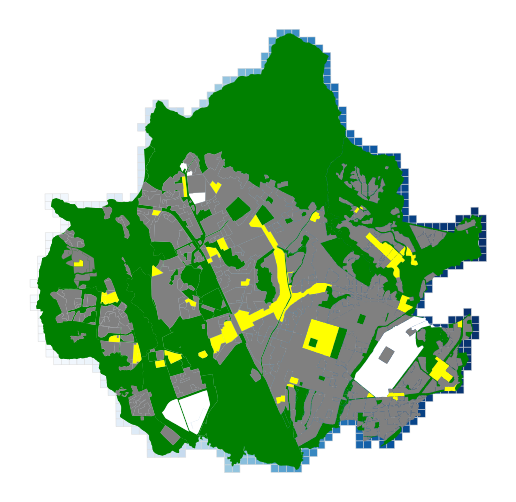

In [118]:
f, ax = plt.subplots(1, figsize=(9, 9))
suwon_112_grid.plot(linewidth=0.5,cmap="Blues" ,ax=ax, edgecolor = 'gainsboro', legend=True)
suwon_use_area_green.plot(color="Green",ax=ax)
suwon_use_area_fac.plot(color="White",ax=ax)
suwon_use_area_sell.plot(color="Yellow",ax=ax)
suwon_use_area_live.plot(color="Grey",ax=ax)
ax.set_axis_off()

In [119]:
suwon_use_area_sell_intersect = gpd.overlay(suwon_112_grid,suwon_use_area_sell, how="intersection")
# suwon_use_area_sell_intersect : suwon_use_area_sell와 suwon_112_grid(수원시의 grid)의 겹치는 영역 산출

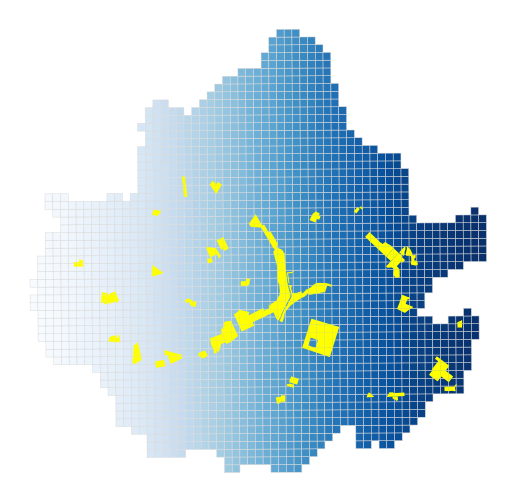

In [120]:
f, ax = plt.subplots(1, figsize=(9, 9))
suwon_112_grid.plot(linewidth=0.5,cmap="Blues" ,ax=ax, edgecolor = 'gainsboro', legend=True)
suwon_use_area_sell_intersect.plot(color="Yellow",ax=ax)
ax.set_axis_off()

In [121]:
suwon_use_area_sell_intersect["area"] = suwon_use_area_sell_intersect["geometry"].apply(lambda x : x.area)
# Polygon 영역 넓이 구하기
# 제곱미터로 바꿔주긴 해야할듯

suwon_use_area_sell_intersect_groupby = suwon_use_area_sell_intersect.groupby(["gid","코드명"]).agg({"area":"sum"})
# gid 별 영역 넓이 합

In [122]:
suwon_use_area_sell_intersect_groupby

,,area
gid,코드명,
다사50ab20ba,일반상업지역,7.985618e-07
다사50ab20bb,일반상업지역,4.221177e-07
다사50ba20ba,일반상업지역,2.178474e-06
다사50ba20bb,일반상업지역,1.984859e-06
다사51ab19ab,근린상업지역,6.205563e-07
...,...,...
다사62ba17aa,중심상업지역,1.706561e-06
다사62ba17ab,중심상업지역,1.103744e-07
다사62bb16bb,근린상업지역,5.626140e-08


> ## Buffer 데이터

#### 1) 사고다발지역

In [123]:
suwon_112_grid = gpd.read_file('2.수원시_112신고(격자별 신고횟수).geojson').drop(["rep_cnt"],axis=1)

all_risk_area_geo = gpd.read_file("사고유형별_사고다발지역.geojson")
# 사고유형별 사고다발지역 데이터
all_risk_area_geo.head(2)

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,사고유형,geometry
0,6596147,2020015,1129013600,11290001,서울특별시 성북구1,서울특별시 성북구 하월곡동(자보습학원 부근),2,2,0,0,2,0,127.039411,37.604215,스쿨존내어린이사고,"POLYGON ((127.04211 37.60421, 127.04205 37.603..."
1,6596479,2020015,1135010200,11350001,서울특별시 노원구1,서울특별시 노원구 월계동(서울신화초교 부근),2,2,0,1,1,0,127.040824,37.632564,스쿨존내어린이사고,"POLYGON ((127.04352 37.63256, 127.04347 37.632..."


In [124]:
def buffer_사고다발유형_격자별매핑(buffer,suwon_112_grid):
    # buffer : buffer 데이터
    # suwon_112_grid : grid 데이터
    result_lst = []
    
    buffer_intersect = gpd.overlay(suwon_112_grid, buffer, how="intersection")
    # suwon_112_grid(수원시의 grid)의 겹치는 영역 산출
    
    buffer_intersect["area"] = buffer_intersect["geometry"].apply(lambda x : x.area)
    # 넓이 구하기
    
    for risk in all_risk_area_geo["사고유형"].value_counts().index:
        data = buffer_intersect[buffer_intersect["사고유형"] == risk]
        data_groupby = data.groupby(["gid"]).agg({"area":"sum"}).reset_index().rename(columns={"area":risk})
        # 사고다발유형별 gid 별 영역 넓이 합
        
        result_lst.append(data_groupby)
    
    result_buffer = suwon_112_grid
    for data in result_lst:
        result_buffer = pd.merge(result_buffer,data,on="gid",how="left").fillna(0)
    
    result_buffer["사고다발지역"] = ( result_buffer["보행고령자사고"] + result_buffer["보행자무단횡단사고"] + result_buffer["자전거사고"] + 
                               result_buffer["보행어린이사고"] + result_buffer["스쿨존내어린이사고"] )
    # 5개영역합
    
    return result_buffer.drop("geometry",axis=1)

In [125]:
result_buffer_grid = buffer_사고다발유형_격자별매핑(all_risk_area_geo,suwon_112_grid)

In [126]:
result5 = result_buffer_grid

result5[result5["gid"] == "다사55ab22aa"]

,gid,보행고령자사고,보행자무단횡단사고,자전거사고,보행어린이사고,스쿨존내어린이사고,사고다발지역
822,다사55ab22aa,0.0,0.0,0.000005,0.0,0.0,0.000005


def buffer_격자별매핑(buffer,suwon_112_grid):
    # buffer : buffer 데이터
    # suwon_112_grid : grid 데이터
    
    buffer_intersect = gpd.overlay(suwon_112_grid, buffer, how="intersection")
    # suwon_112_grid(수원시의 grid)의 겹치는 영역 산출
    
    buffer_intersect["area"] = buffer_intersect["geometry"].apply(lambda x : x.area)
    # 넓이 구하기
    
    buffer_intersect_groupby = buffer_intersect.groupby(["gid"]).agg({"area":"sum"}).reset_index()
    # gid 별 영역 넓이 합
    
    return buffer_intersect_groupby.rename(columns={"area":"사고다발지역"})
result_buffer_grid = buffer_격자별매핑(all_risk_area_geo,suwon_112_grid)

#### 2) 치안안전시설 Buffer
- 가로등,CCTV,비상벨,방범등,편의점,치안센터,파출소,지구대,경찰서 Buffer
- 치안센터 반경 300m Buffer / 경찰서 1000 / 유흥업소 100 / 가로등 10 / cctv 100

In [127]:
suwon_street_lamp = pd.read_csv('21.수원시_가로등현황.csv')
others_security_lamp = pd.read_csv('22.4개시도_보안등현황.csv')

others_security_bell = gpd.read_file('23.4개시도_안전비상벨현황.geojson')
others_cctv = pd.read_csv('24.4개시도_CCTV설치현황.csv')
others_police = pd.read_csv('39.4개시도_경찰관서현황.csv')
others_police_box_area = gpd.read_file('12.4개시도_치안안전센터_관할경계.geojson')

suwon_112_grid = gpd.read_file('2.수원시_112신고(격자별 신고횟수).geojson').drop(["rep_cnt"],axis=1)

others_alcohol = gpd.read_file('8.4개시도_유흥업소현황.geojson')
# 수원시 격자정보


In [128]:
others_alcohol.head(2)
others_alcohol = others_alcohol.drop("geometry",axis=1).rename(columns={"LAT":"lat","LON":"lon"})
# 4개 시도의 유흥업소 현황

In [129]:
others_cctv.head(2)
# 4개 시도의 CCTV

,address,purpose,cctv_cnt,set_yr,lat,lon
0,경상남도 진주시 집현면 지내리 125,어린이보호,1,`2013-12,35.241319,128.093399
1,경상남도 진주시 집현면 지내리 125,어린이보호,4,`2013-12,35.242023,128.091990


In [130]:
others_security_lamp.head(2)
# 4개 시도의 보안등

,year,address,securitylight_cnt,lon,lat
0,2016.0,경상남도 진주시 가좌동 1398,1,128.109417,35.159683
1,2010.0,경상남도 진주시 가좌동 1555-1,1,128.125589,35.152041


In [131]:
suwon_street_lamp.head(2)
# 수원의 가로등

,sgg_nm,road_addr,jibun_addr,lat,lon,install_year,install_type,manage_dept,manage_dept_pn,base_date
0,수원시,NaN,경기도 수원시 장안구 연무동 산 1-4,37.301144,127.031677,2011,전용주,도로관리과,031-228-4309,2020-08-21
1,수원시,NaN,경기도 수원시 장안구 연무동 4-25,37.300966,127.031689,2011,전용주,도로관리과,031-228-4309,2020-08-21


In [132]:
suwon_others_police = others_police[others_police["pname"] == "경기남부청"]

suwon_police = suwon_others_police[suwon_others_police["name"].str.contains("경찰서")]
suwon_police_box = suwon_others_police[suwon_others_police["name"].str.contains("경찰서")== False]

In [133]:
suwon_police
# 수원의 경찰서

,pname,psname,name,lon,lat,addr
202,경기남부청,수원남부경찰서,수원남부경찰서,127.054428,37.272159,수원시 매탄2동 1196
285,경기남부청,수원서부경찰서,수원서부경찰서,126.972270,37.258757,수원시 권선구 탑동 911
287,경기남부청,수원중부경찰서,수원중부경찰서,126.996282,37.297956,수원시 장안구 정자3동 873-4


In [134]:
suwon_police_box.head(3)
# 수원의 치안센터

,pname,psname,name,lon,lat,addr
196,경기남부청,수원남부경찰서,곡선지구대,127.030039,37.251801,권선구 권선동 1268-5
197,경기남부청,수원남부경찰서,광교파출소,127.047712,37.289558,경기도 수원시 영통구 이의동 1347-2
198,경기남부청,수원남부경찰서,권선파출소,127.026288,37.260749,권선구 권선동1012


In [135]:
def point_buffer_격자별매핑(data_df,suwon_grid,col,buffer_num):
    # col : 경찰서, 치안센터, cctv (str)
    # buffer_num : 치안안전시설에 따라 10,300,1000 (int)
    
    df = data_df.copy()
    epsg4326 = from_string("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
    df['Point'] = df.apply(lambda x : Point([x['lon'], x['lat']]), axis=1)
    df = gpd.GeoDataFrame(df, geometry='Point', crs = epsg4326).to_crs(epsg="5186")
    # Buffer 부여하기 위해서 Point 임시 epsg 5186 좌표계로 변환

    df["geometry"] = df["Point"].apply(lambda x : x.buffer(buffer_num))
    df = df.drop("Point",axis=1)
    df = gpd.GeoDataFrame(df, geometry='geometry').to_crs(epsg="4326")
    # Buffer 부여한 뒤에 epsg 4326 좌표계로 변환

    df['Point'] = df.apply(lambda x : Point([x['lon'], x['lat']]), axis=1)
    # drop한 좌표 다시 넣어주기
    
    df_intersect = gpd.overlay(suwon_grid,df, how="intersection")
    df_intersect = df_intersect.to_crs(epsg="5186")
    
    df_intersect[col+"_Buffer면적"] = df_intersect["geometry"].apply(lambda x : x.area)
    # 면적은 5186 좌표계에서 구하기
    # 겹치는 면적 구하기 좌표계 바꿔서 구하자
    df_intersect = df_intersect.to_crs(epsg="4326")
    # 다시 좌표계 반환

    df_intersect_sum = df_intersect.groupby("gid").agg({col+"_Buffer면적":"sum"}).reset_index()
    return df_intersect,df_intersect_sum

#### Buffer 구해주기
- 치안센터 반경 300 / 경찰서 1000 / 유흥업소 100 / 가로등 10 / cctv 100

In [136]:
suwon_police_buffer,suwon_police_buffer_sum = point_buffer_격자별매핑(suwon_police,suwon_112_grid,"경찰서",1000)
# 수원 경찰서

suwon_police_box_buffer,suwon_police_box_buffer_sum = point_buffer_격자별매핑(suwon_police_box,suwon_112_grid,"치안센터",300)
# 수원 치안센터

others_security_lamp_buffer,others_security_lamp_buffer_sum = point_buffer_격자별매핑(others_security_lamp,suwon_112_grid,"보안등",10)
# 수원 보안등

suwon_street_lamp_buffer,suwon_street_lamp_buffer_sum = point_buffer_격자별매핑(suwon_street_lamp,suwon_112_grid,"가로등",10)
# 수원 가로등

others_cctv_buffer,others_cctv_buffer_sum = point_buffer_격자별매핑(others_cctv,suwon_112_grid,"CCTV",100)
# 수원 CCTV

others_alcohol_buffer,others_alcohol_buffer_sum = point_buffer_격자별매핑(others_alcohol,suwon_112_grid,"유흥업소",100)
# 수원 유흥업소

others_school_buffer,others_school_buffer_sum = point_buffer_격자별매핑(others_school,suwon_112_grid,"교육환경보호구역",200)
# 수원 초중고

교육환경보호구역인 학교

In [137]:
others_school = pd.read_csv("4개시도_초중고.csv")

In [142]:
others_school_buffer,others_school_buffer_sum = point_buffer_격자별매핑(others_school,suwon_112_grid,"교육환경보호구역",200)

In [144]:
result_safe_buffer = suwon_112_grid
for data in [suwon_police_buffer_sum,suwon_police_box_buffer_sum,others_security_lamp_buffer_sum,
             suwon_street_lamp_buffer_sum,others_cctv_buffer_sum,others_alcohol_buffer_sum,others_school_buffer_sum]:
    result_safe_buffer = pd.merge(result_safe_buffer,data,on="gid",how="left").fillna(0)

시각화해보기

In [154]:
result6 = result_safe_buffer
result6

,gid,geometry,경찰서_Buffer면적,치안센터_Buffer면적,보안등_Buffer면적,가로등_Buffer면적,CCTV_Buffer면적,유흥업소_Buffer면적,교육환경보호구역_Buffer면적
0,다사49aa19ab,"MULTIPOLYGON (((126.92477 37.27077, 126.92475 ...",0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,다사49aa19ba,"MULTIPOLYGON (((126.92475 37.27302, 126.92473 ...",0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,다사49aa20aa,"MULTIPOLYGON (((126.92472 37.27753, 126.92470 ...",0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,다사49ab18ab,"MULTIPOLYGON (((126.92766 37.26177, 126.92764 ...",0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,다사49ab18ba,"MULTIPOLYGON (((126.92764 37.26402, 126.92762 ...",0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2085,다사63ba21aa,"MULTIPOLYGON (((127.08822 37.28722, 127.08821 ...",0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2086,다사63ba21ab,"MULTIPOLYGON (((127.08821 37.28947, 127.08820 ...",0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2087,다사63ba21ba,"MULTIPOLYGON (((127.08820 37.29173, 127.08819 ...",0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2088,다사63ba21bb,"MULTIPOLYGON (((127.08819 37.29398, 127.08818 ...",0.0,0.0,0.0,627.309698,0.0,0.0,0.0


<AxesSubplot:>

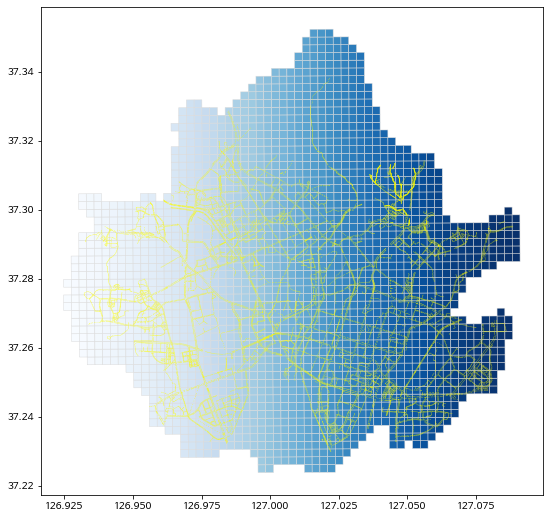

In [155]:
f, ax = plt.subplots(1, figsize=(9, 9))
suwon_112_grid.plot(linewidth=0.5,cmap="Blues" ,ax=ax, edgecolor = 'gainsboro', legend=True)
suwon_street_lamp_buffer.plot(color="Yellow",ax=ax)
# 가로등

<AxesSubplot:>

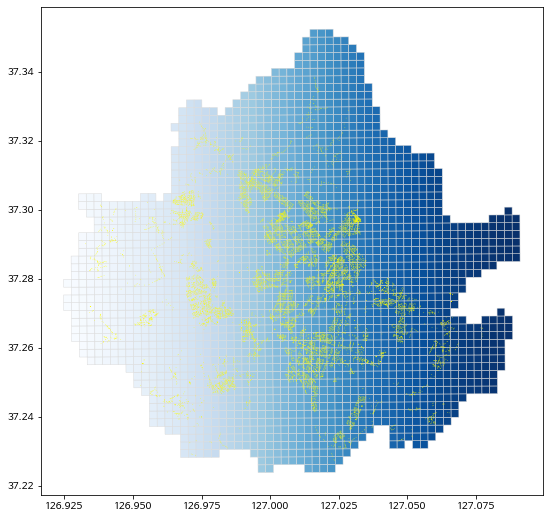

In [146]:
f, ax = plt.subplots(1, figsize=(9, 9))
suwon_112_grid.plot(linewidth=0.5,cmap="Blues" ,ax=ax, edgecolor = 'gainsboro', legend=True)
others_security_lamp_buffer.plot(color="Yellow",ax=ax)
# 보안등

<AxesSubplot:>

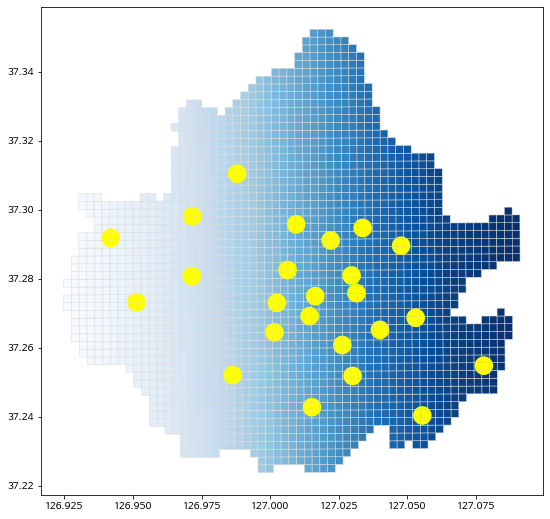

In [147]:
f, ax = plt.subplots(1, figsize=(9, 9))
suwon_112_grid.plot(linewidth=0.5,cmap="Blues" ,ax=ax, edgecolor = 'gainsboro', legend=True)
suwon_police_box_buffer.plot(color="Yellow",ax=ax)
# 치안센터

<AxesSubplot:>

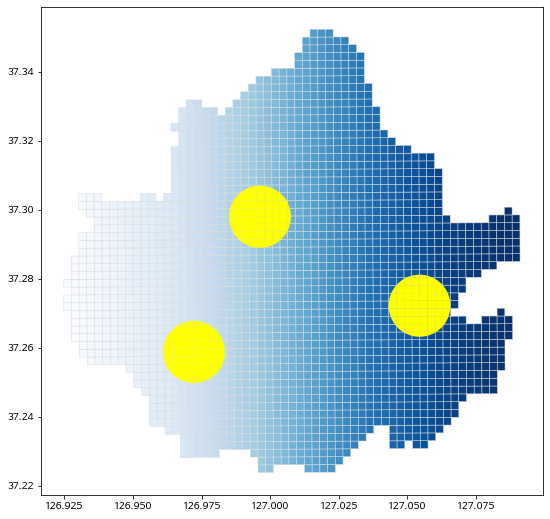

In [148]:
f, ax = plt.subplots(1, figsize=(9, 9))
suwon_112_grid.plot(linewidth=0.5,cmap="Blues" ,ax=ax, edgecolor = 'gainsboro', legend=True)
suwon_police_buffer.plot(color="Yellow",ax=ax)
# 경찰서

<AxesSubplot:>

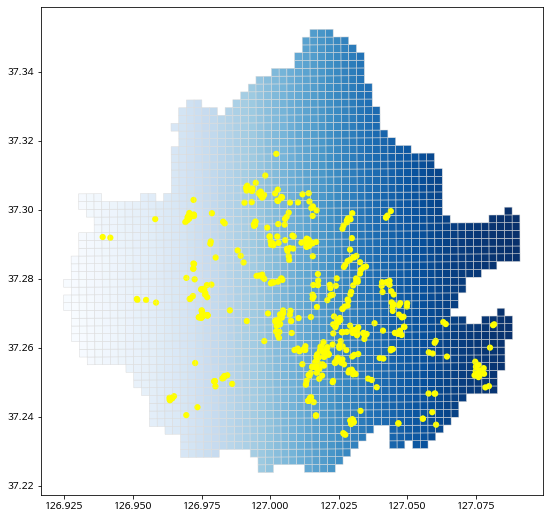

In [149]:
f, ax = plt.subplots(1, figsize=(9, 9))
suwon_112_grid.plot(linewidth=0.5,cmap="Blues" ,ax=ax, edgecolor = 'gainsboro', legend=True)
others_alcohol_buffer.plot(color="Yellow",ax=ax)
# 유흥업소

<AxesSubplot:>

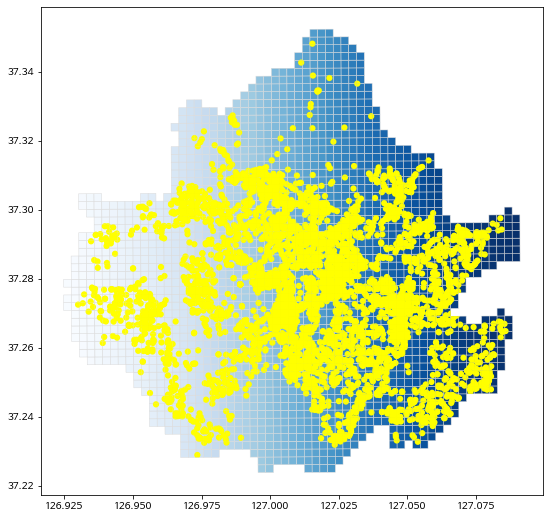

In [150]:
f, ax = plt.subplots(1, figsize=(9, 9))
suwon_112_grid.plot(linewidth=0.5,cmap="Blues" ,ax=ax, edgecolor = 'gainsboro', legend=True)
others_cctv_buffer.plot(color="Yellow",ax=ax)
# CCTV

<AxesSubplot:>

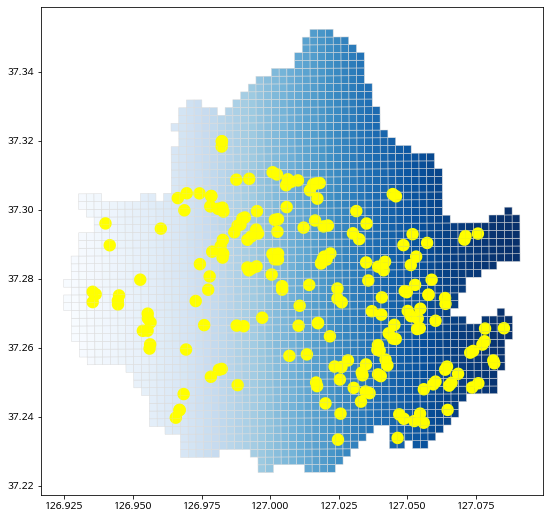

In [151]:
f, ax = plt.subplots(1, figsize=(9, 9))
suwon_112_grid.plot(linewidth=0.5,cmap="Blues" ,ax=ax, edgecolor = 'gainsboro', legend=True)
others_school_buffer.plot(color="Yellow",ax=ax)
# 초중고

### 표제부 데이터 가공한 것

In [152]:
result7 = pd.read_csv("수원시_표제부시설현황.csv")
result7.head()

,gid,제1종근린생활시설_격자별개수,제2종근린생활시설_격자별개수,문화 및 집회시설_격자별개수,공장_격자별개수,업무시설_격자별개수,교육연구시설_격자별개수,교육연구및복지시설_격자별개수,근린생활시설_격자별개수
0,다사49aa19ab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,다사49aa19ba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,다사49aa20aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,다사49ab18ab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,다사49ab18ba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 링크 데이터 가공한 것

In [14]:
result8 = pd.read_csv("수원시_링크현황.csv")
result8.head()

,gid,차로수,최고제한속도
0,다사49aa19ab,0.0,0
1,다사49aa19ba,0.0,0
2,다사49aa20aa,0.0,0
3,다사49ab18ab,0.0,0
4,다사49ab18ba,0.0,0


## 종속변수와 독립변수 연결하기

- 독립변수 250 격자 : ("250격자데이터_독립변수.geojson")
- 독립변수 500 격자(접근성데이터 추가) : ("500격자데이터_독립변수.geojson")

In [156]:
최종데이터프레임 = pd.merge(result1,result2,on=["gid"],how="left")
최종데이터프레임 = pd.merge(최종데이터프레임,result3,on=["gid","geometry"],how="left")
최종데이터프레임 = pd.merge(최종데이터프레임,result4,on=["gid","geometry"],how="left")
최종데이터프레임 = pd.merge(최종데이터프레임,result5,on=["gid"],how="left")
최종데이터프레임 = pd.merge(최종데이터프레임,result6,on=["gid","geometry"],how="left")
최종데이터프레임 = pd.merge(최종데이터프레임,result7,on=["gid"],how="left")
최종데이터프레임 = pd.merge(최종데이터프레임,result8,on=["gid"],how="left")

In [158]:
최종데이터프레임.to_file("250격자데이터_독립변수.geojson",driver="GeoJSON")

최종데이터프레임 = pd.merge(result,suwon_point_grid_cnt,on=["gid","geometry"],how="left")
최종데이터프레임 = pd.merge(최종데이터프레임,time_sex_weekday_pop_grid_groupby,on="gid",how="left")
최종데이터프레임 = pd.merge(최종데이터프레임,result_merge,on=["gid","geometry"],how="left")
최종데이터프레임 = pd.merge(최종데이터프레임,result_buffer_grid,on="gid",how="left")
최종데이터프레임 = pd.merge(최종데이터프레임,result_safe_buffer,on=["gid","geometry"],how="left")

### 독립변수 500격자 기준으로 변환

In [161]:
suwon_grid_250_500 = pd.read_csv("250격자_500격자_매핑.csv")
suwon_grid_250_500.columns = ["gid","gid_500"]

250 격자 데이터 연결 후 500 격자 기준 groupby

In [170]:
data1 = gpd.read_file("250격자데이터_독립변수.geojson")
suwon_grid_250_500_data = pd.merge(suwon_grid_250_500,data1,on="gid",how="inner").drop("geometry",axis=1)
aggregation = {i:"sum" for i in suwon_grid_250_500_data.columns[2:]}


suwon_grid_250_500_data_groupby = suwon_grid_250_500_data.groupby("gid_500").agg(aggregation).reset_index()

500 격자 데이터(접근성) 연결

In [180]:
suwon_112_grid_500 = gpd.read_file('수원시_500격자.geojson').rename(columns={"gid":"gid_500"})
# 수원시 500 격자정보
suwon_112_grid_500.shape

(484, 3)

In [178]:
최종데이터프레임_500 = pd.merge(suwon_112_grid_500[["gid_500","geometry"]],suwon_grid_250_500_data_groupby,
                       on ="gid_500",how="left")

In [182]:
최종데이터프레임_500.to_file("500격자데이터_독립변수.geojson",driver="GeoJSON")

In [193]:
for i in 최종데이터프레임_500.columns:
    print(i)

gid_500
geometry
총인구수
여자인구수
남자인구수
고령자수
주거용건축물면적
단독주거건축물
공동주거건축물
주거용도용적률
35년이상건축물수
30~34년건축물수
총건축물수
개별주택가격
청년수
30년이상건축물수
30년이상건축물비율
단독주거건축물비율
공동주거건축물비율
월요일유동인구
화요일유동인구
수요일유동인구
목요일유동인구
금요일유동인구
토요일유동인구
일요일유동인구
0시기준_측정정보
1시기준_측정정보
2시기준_측정정보
3시기준_측정정보
4시기준_측정정보
5시기준_측정정보
6시기준_측정정보
7시기준_측정정보
8시기준_측정정보
9시기준_측정정보
10시기준_측정정보
11시기준_측정정보
12시기준_측정정보
13시기준_측정정보
14시기준_측정정보
15시기준_측정정보
16시기준_측정정보
17시기준_측정정보
18시기준_측정정보
19시기준_측정정보
20시기준_측정정보
21시기준_측정정보
22시기준_측정정보
23시기준_측정정보
남자유동인구수_10대_수치
남자유동인구수_20대_수치
남자유동인구수_30대_수치
남자유동인구수_40대_수치
남자유동인구수_50대_수치
남자유동인구수_60대이상_수치
여자유동인구수_10대_수치
여자유동인구수_20대_수치
여자유동인구수_30대_수치
여자유동인구수_40대_수치
여자유동인구수_50대_수치
여자유동인구수_60대이상_수치
여성안심택배함_격자별개수
편의점_격자별개수
공원_격자별개수
안전비상벨_격자별개수
노숙인자활시설_격자별개수
아동복지시설_격자별개수
지역아동센터시설_격자별개수
청소년공부방_격자별개수
도서관_격자별개수
무료급식소_격자별개수
어린이놀이시설_격자별개수
가로등_격자별개수
유흥업소_격자별개수
경찰서_치안센터_격자별개수
보안등_격자별개수
CCTV_격자별개수
병원_격자별개수
약국_격자별개수
지하철_격자별개수
초중고_격자별개수
어린이집_격자별개수
유치원_격자별개수
숙박시설_격자별개수
유흥주점_격자별개수_x
스포츠시설_격자별개수
상업시설_격자별개수
위락시설_격자별개수
유흥주점_격자별개수_y
상업지역면적
공업지역면적
주거지역면적
녹지지역면적
보행고령

In [11]:
최종데이터프레임_500 = gpd.read_file("500격자데이터_독립변수.geojson")

result_500 = gpd.read_file("500격자데이터.geojson").rename(columns={"gid":"gid_500"})

In [13]:
최종데이터프레임_500 = pd.merge(최종데이터프레임_500,result_500,on=["gid_500","geometry"],how="inner")

In [15]:
최종데이터프레임_500.to_file("500격자데이터_독립변수(접근성연결).geojson",driver="GeoJSON")

> # 종속변수 연결

### 시간대별로 나누기

In [12]:
최종데이터프레임 = gpd.read_file("250격자데이터_독립변수.geojson")

In [13]:
새벽_데이터프레임 = 최종데이터프레임.drop([str(i)+"시기준_측정정보" for i in range(24) if i not in [j for j in range(2,8)]],axis=1)
# 새벽 : 2~7시

출근점심_데이터프레임 = 최종데이터프레임.drop([str(i)+"시기준_측정정보" for i in range(24) if i not in [j for j in range(8,14)]],axis=1)
# 출근점심 : 8~13시

오후퇴근_데이터프레임 = 최종데이터프레임.drop([str(i)+"시기준_측정정보" for i in range(24) if i not in [j for j in range(14,20)]],axis=1)
# 오후퇴근 : 14~19시

저녁심야_데이터프레임 = 최종데이터프레임.drop([str(i)+"시기준_측정정보" for i in range(24) if i not in [20,21,22,23,0,1]],axis=1)
# 저녁심야 : 20~1시

In [22]:
새벽_데이터프레임.head(2)

,gid,총인구수,여자인구수,남자인구수,고령자수,주거용건축물면적,단독주거건축물,공동주거건축물,주거용도용적률,35년이상건축물수,...,교육환경보호구역_Buffer면적,제1종근린생활시설_격자별개수,제2종근린생활시설_격자별개수,문화 및 집회시설_격자별개수,공장_격자별개수,업무시설_격자별개수,교육연구시설_격자별개수,교육연구및복지시설_격자별개수,근린생활시설_격자별개수,geometry
0,다사49aa19ab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((126.92477 37.27077, 126.92475 ..."
1,다사49aa19ba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((126.92475 37.27302, 126.92473 ..."


종속변수 연결하기
- 시간대 정보가 담긴 종속변수
- 신고 중분류 없이 전부 sum

In [75]:
test = gpd.read_file("500격자데이터_독립변수(접근성연결).geojson")

In [77]:
for i in test.columns:
    print(i)

gid_500
총인구수
여자인구수
남자인구수
고령자수
주거용건축물면적
단독주거건축물
공동주거건축물
주거용도용적률
35년이상건축물수
30~34년건축물수
총건축물수
개별주택가격
청년수
30년이상건축물수
30년이상건축물비율
단독주거건축물비율
공동주거건축물비율
월요일유동인구
화요일유동인구
수요일유동인구
목요일유동인구
금요일유동인구
토요일유동인구
일요일유동인구
0시기준_측정정보
1시기준_측정정보
2시기준_측정정보
3시기준_측정정보
4시기준_측정정보
5시기준_측정정보
6시기준_측정정보
7시기준_측정정보
8시기준_측정정보
9시기준_측정정보
10시기준_측정정보
11시기준_측정정보
12시기준_측정정보
13시기준_측정정보
14시기준_측정정보
15시기준_측정정보
16시기준_측정정보
17시기준_측정정보
18시기준_측정정보
19시기준_측정정보
20시기준_측정정보
21시기준_측정정보
22시기준_측정정보
23시기준_측정정보
남자유동인구수_10대_수치
남자유동인구수_20대_수치
남자유동인구수_30대_수치
남자유동인구수_40대_수치
남자유동인구수_50대_수치
남자유동인구수_60대이상_수치
여자유동인구수_10대_수치
여자유동인구수_20대_수치
여자유동인구수_30대_수치
여자유동인구수_40대_수치
여자유동인구수_50대_수치
여자유동인구수_60대이상_수치
여성안심택배함_격자별개수
편의점_격자별개수
공원_격자별개수
안전비상벨_격자별개수
노숙인자활시설_격자별개수
아동복지시설_격자별개수
지역아동센터시설_격자별개수
청소년공부방_격자별개수
도서관_격자별개수
무료급식소_격자별개수
어린이놀이시설_격자별개수
가로등_격자별개수
유흥업소_격자별개수
경찰서_치안센터_격자별개수
보안등_격자별개수
CCTV_격자별개수
병원_격자별개수
약국_격자별개수
지하철_격자별개수
초중고_격자별개수
어린이집_격자별개수
유치원_격자별개수
숙박시설_격자별개수
유흥주점_격자별개수_x
스포츠시설_격자별개수
상업시설_격자별개수
위락시설_격자별개수
유흥주점_격자별개수_y
상업지역면적
공업지역면적
주거지역면적
녹지지역면적
보행고령자사고
보행자무단

(484, 134)

시간대마다 분포가 많이 다른지

In [10]:
# 수원시 격자정보
suwon_112_grid = gpd.read_file('2.수원시_112신고(격자별 신고횟수).geojson').drop(["rep_cnt"],axis=1)

# 수원시 격자별 신고
time_rep_cnt = pd.read_csv("1.수원시_112신고이력(격자_관할경계매핑)_전처리완료.csv")

<AxesSubplot:>

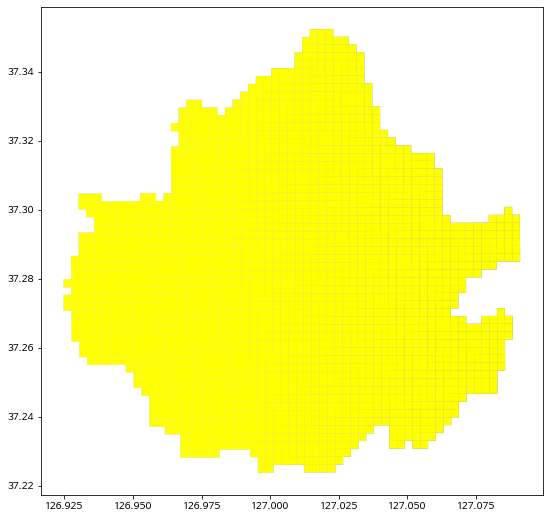

In [18]:
f, ax = plt.subplots(1, figsize=(9, 9))
suwon_112_grid.plot(linewidth=0.5,cmap="Blues" ,ax=ax, edgecolor = 'gainsboro', legend=True)
시간대별_중분류별_최종데이터프레임_lst[0].plot(color="Yellow",ax=ax)
# 질서유지 새벽

In [26]:
시간대별_중분류별_최종데이터프레임_lst[8]

,gid,총인구수,여자인구수,남자인구수,고령자수,주거용건축물면적,단독주거건축물,공동주거건축물,주거용도용적률,35년이상건축물수,...,문화 및 집회시설_격자별개수,공장_격자별개수,업무시설_격자별개수,교육연구시설_격자별개수,교육연구및복지시설_격자별개수,근린생활시설_격자별개수,geometry,시간대,사건종별_중분류,rep_cnt
0,다사49aa19ab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((126.92477 37.27077, 126.92475 ...",새벽,교통,0.0
1,다사49aa19ba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((126.92475 37.27302, 126.92473 ...",새벽,교통,0.0
2,다사49aa20aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((126.92472 37.27753, 126.92470 ...",새벽,교통,0.0
3,다사49ab18ab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((126.92766 37.26177, 126.92764 ...",새벽,교통,0.0
4,다사49ab18ba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((126.92764 37.26402, 126.92762 ...",새벽,교통,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,다사63ba21aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((127.08822 37.28722, 127.08821 ...",새벽,교통,0.0
2086,다사63ba21ab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((127.08821 37.28947, 127.08820 ...",새벽,교통,0.0
2087,다사63ba21ba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((127.08820 37.29173, 127.08819 ...",새벽,교통,0.0
2088,다사63ba21bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((127.08819 37.29398, 127.08818 ...",새벽,교통,0.0


In [25]:
시간대별_중분류별_최종데이터프레임_lst[8].to_file("교통_새벽.geojson",driver="GeoJSON")
시간대별_중분류별_최종데이터프레임_lst[9].to_file("교통_출근점심.geojson",driver="GeoJSON")
시간대별_중분류별_최종데이터프레임_lst[10].to_file("교통_오후퇴근.geojson",driver="GeoJSON")
시간대별_중분류별_최종데이터프레임_lst[11].to_file("교통_저녁심야.geojson",driver="GeoJSON")

In [8]:
time_rep_cnt = pd.read_csv("1.수원시_112신고이력(격자_관할경계매핑)_전처리완료.csv")
time_rep_cnt["사건종별_중분류"].value_counts()

질서유지       76235
기타_경찰업무    45832
교통         30480
기타범죄       27922
중요범죄       24151
타기관_기타     19144
Name: 사건종별_중분류, dtype: int64

In [14]:
time_rep_cnt["rep_cnt"] = 1
time_rep_cnt = time_rep_cnt.groupby(["gid","시간대","사건종별_중분류"]).agg({"rep_cnt":"sum"}).reset_index()

시간대별_중분류별_최종데이터프레임_lst
- 새벽_교통_데이터프레임 -> 이런 식으로 시간대별, 사건중분류별이 격자별 데이터가 들어감
- 총 24개의 데이터가 들어감

In [15]:
시간대별_최종데이터프레임_lst = [새벽_데이터프레임,출근점심_데이터프레임,오후퇴근_데이터프레임,저녁심야_데이터프레임]
시간대별_중분류별_최종데이터프레임_lst = []

for 사건중분류 in ["질서유지","기타_경찰업무","교통","기타범죄","중요범죄","타기관_기타"]:
    cnt = 0
    for 시간대 in ["새벽","출근/점심시간","오후/퇴근시간","저녁/심야시간"]:
        result = pd.merge(시간대별_최종데이터프레임_lst[cnt],
                         time_rep_cnt[(time_rep_cnt["시간대"] == 시간대) & 
                                      (time_rep_cnt["사건종별_중분류"] == 사건중분류)],on="gid",how="left")
        result["시간대"] = 시간대 ; result["사건종별_중분류"] = 사건중분류 ; result["rep_cnt"] = result["rep_cnt"].fillna(0)
        
        cnt+=1
        
        시간대별_중분류별_최종데이터프레임_lst.append(result)


In [72]:
시간대별_중분류별_최종데이터프레임_lst[23]

# 새벽 - 질서유지

,gid,총인구수,여자인구수,남자인구수,고령자수,주거용건축물면적,단독주거건축물,공동주거건축물,주거용도용적률,35년이상건축물수,...,문화 및 집회시설_격자별개수,공장_격자별개수,업무시설_격자별개수,교육연구시설_격자별개수,교육연구및복지시설_격자별개수,근린생활시설_격자별개수,geometry,시간대,사건종별_중분류,rep_cnt
0,다사49aa19ab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((126.92477 37.27077, 126.92475 ...",저녁/심야시간,타기관_기타,0.0
1,다사49aa19ba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((126.92475 37.27302, 126.92473 ...",저녁/심야시간,타기관_기타,0.0
2,다사49aa20aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((126.92472 37.27753, 126.92470 ...",저녁/심야시간,타기관_기타,0.0
3,다사49ab18ab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((126.92766 37.26177, 126.92764 ...",저녁/심야시간,타기관_기타,0.0
4,다사49ab18ba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((126.92764 37.26402, 126.92762 ...",저녁/심야시간,타기관_기타,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,다사63ba21aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((127.08822 37.28722, 127.08821 ...",저녁/심야시간,타기관_기타,0.0
2086,다사63ba21ab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((127.08821 37.28947, 127.08820 ...",저녁/심야시간,타기관_기타,0.0
2087,다사63ba21ba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((127.08820 37.29173, 127.08819 ...",저녁/심야시간,타기관_기타,0.0
2088,다사63ba21bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((127.08819 37.29398, 127.08818 ...",저녁/심야시간,타기관_기타,0.0
